**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**August, 2022**

Plots included in the manuscript

----

# Notebook to plot the figures included in the paper - Figure S2 mainly


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt

import os
import sys

In [6]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/figs_forSubmission/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable
plt.rcParams['figure.figsize']=(5,5) #rescale figures

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0


In [4]:
def Barplot(which_var, adata, var='identity', height=3, color = False, suffix= '', fig_format='svg'):
    
    '''
    Function to plot barplots plotting the proportion of cells per catergory in var, coming from each category in which_var.
    
    Parameters:
        which_var: column name in .obs. Contains the categories to contrast.
        adata: anndata object.
        var: column name in .obs. It contains the categories of the cells.
        height: plot height
        color: colors to use
        suffix: string. Suffix to be added at the end of the name of the plot.
    
    Return:
        Saves bar plot as a pdf.
        
    '''
    
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    ax1.set_xlim(0, 100)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+ suffix+'.'+fig_format, bbox_inches='tight',
                       dpi=300, orientation='landscape', format= fig_format, optimize=True)

### LOADING DATA

In [4]:
adata=sc.read('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_20220523.h5ad')

### Selecting only the day 0 and day 2 (48h) samples

In [5]:
adata = adata[adata.obs['day'] != 'd3']
adata = adata[adata.obs['day'] != 'd1']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [18]:
#REMOVING this donor as it showes huge variability and inflammation. It was part of the pilot studies before the the explants were optimised
adata = adata[adata.obs['donor_souporcell'] != 'Hrv107']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


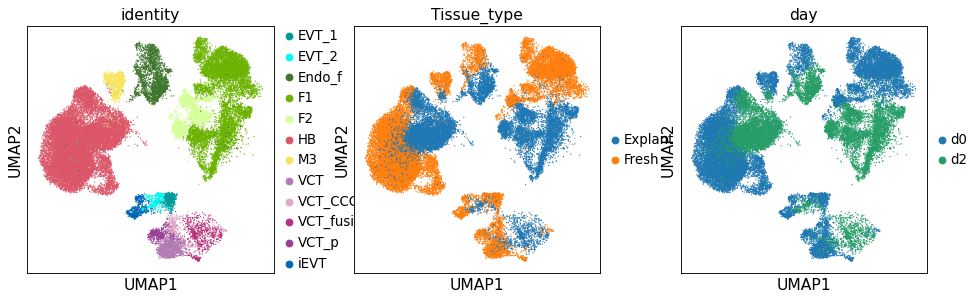

In [19]:
sc.pl.umap(adata, color=['identity','Tissue_type','day' ],legend_fontsize=12, size=5)

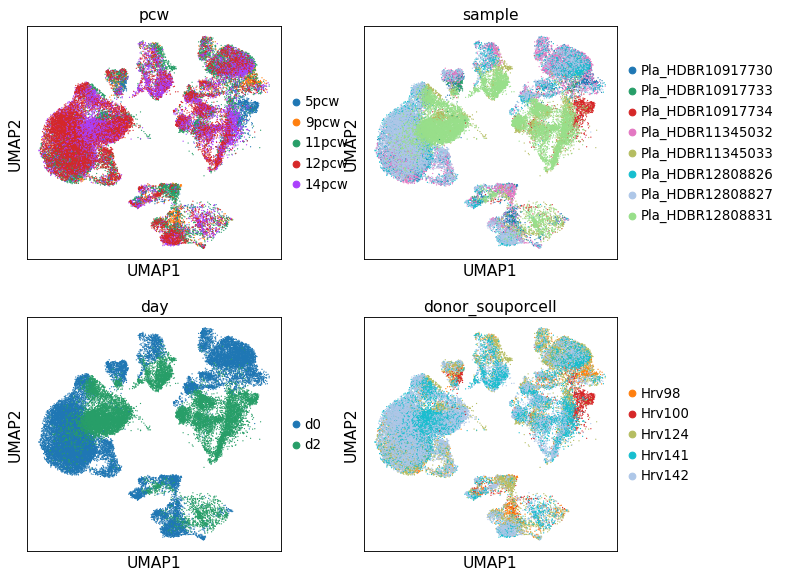

In [20]:
sc.pl.umap(adata, color=['pcw','sample','day', 'donor_souporcell' ],legend_fontsize=12, size=5, ncols=2)

In [8]:
adata

AnnData object with n_obs × n_vars = 57912 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity', 'Tissue_type', 'identity_broad'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'Tissue_type_colors', '_scvi', 'day_colors', 'donor_souporcell_colors', 'leiden', 'neighbors', 'pcw_colors', 'phase_colors', 'sample_colors', 'umap', 'identity_colors'
    obsm: 'X_scVI_n_latent_10', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'
    obsp: 'connecti

In [21]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:04)


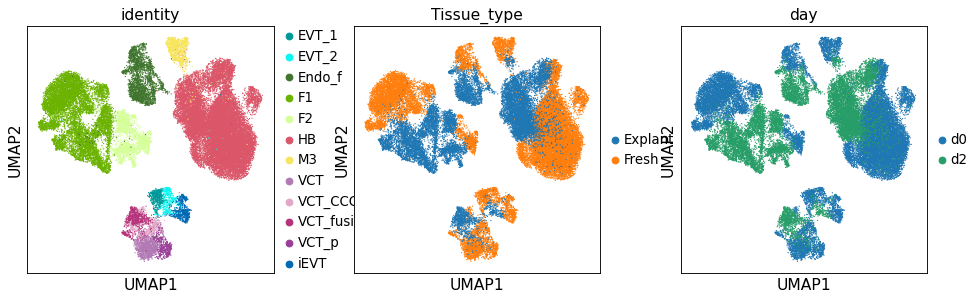

In [22]:
sc.pl.umap(adata, color=['identity','Tissue_type','day' ],legend_fontsize=12, size=5)

### Setting up color palette for future plots

In [24]:
sc.set_figure_params(figsize=(5,5))

In [11]:
#DF with the row names as the identity of the cells
colors_final_df = pd.DataFrame(index = np.unique(adata.obs['identity']))


#Assign each color per cell type under the column color

#colors_final_df.loc['SCT', 'color'] = '#f779a3'
colors_final_df.loc['VCT', 'color'] = '#b27ab4'
colors_final_df.loc['VCT_fusing', 'color'] = '#b53179'
colors_final_df.loc['VCT_p', 'color'] = '#993f98'
colors_final_df.loc['VCT_CCC', 'color'] = '#e2a7c8'

colors_final_df.loc['iEVT', 'color'] = '#0069b4'
colors_final_df.loc['EVT_1', 'color'] = '#009999'
colors_final_df.loc['EVT_2', 'color'] = '#03f9f2'


colors_final_df.loc['Endo_f', 'color'] = '#3f752d'
colors_final_df.loc['F1', 'color'] = '#6bb300'
colors_final_df.loc['F2', 'color'] = '#d6ff99'

colors_final_df.loc['HB', 'color'] = '#db5669'
colors_final_df.loc['M3', 'color'] = '#f7e55e'

colors_final_dict= colors_final_df.to_dict()['color']

In [12]:
colors_final_df

,color
EVT_1,#009999
EVT_2,#03f9f2
Endo_f,#3f752d
F1,#6bb300
F2,#d6ff99
HB,#db5669
M3,#f7e55e
VCT,#b27ab4
VCT_CCC,#e2a7c8
VCT_fusing,#b53179


/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


# Saving fresh/48h data

In [23]:
adata.write('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_FreshDay2_20220523.h5ad')

In [2]:
#adata=sc.read('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_FreshDay2_20220523.h5ad')

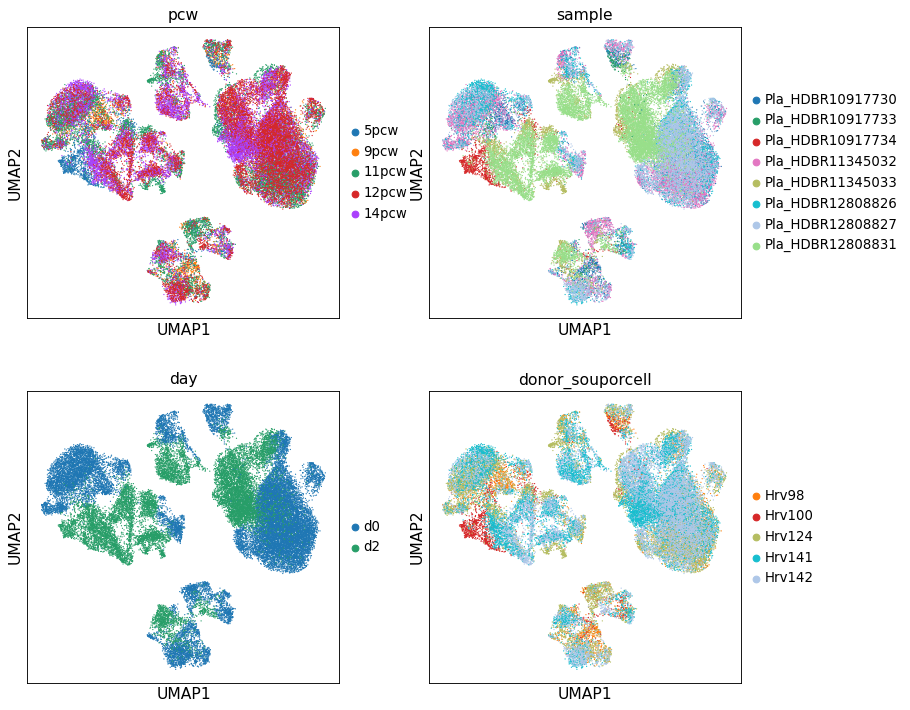

In [7]:
sc.pl.umap(adata, color=['pcw','sample','day', 'donor_souporcell' ],legend_fontsize=12, size=5, ncols=2)

In [5]:
adata

AnnData object with n_obs × n_vars = 37922 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity', 'Tissue_type', 'identity_broad'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'Tissue_type_colors', '_scvi', 'day_colors', 'donor_souporcell_colors', 'identity_colors', 'leiden', 'neighbors', 'pcw_colors', 'phase_colors', 'sample_colors', 'umap'
    obsm: 'X_scVI_n_latent_10', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'
    obsp: 'connecti

## Supplementaty Figure S2C

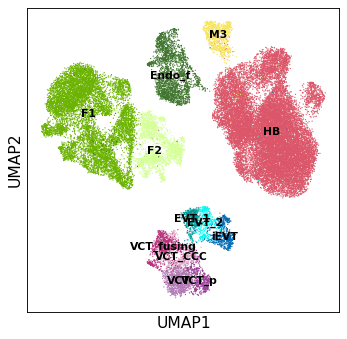

In [25]:
sc.pl.umap(adata, color=['identity'], size=5,
           palette= colors_final_dict, title='', legend_loc='on data',legend_fontsize='x-small', 
          save='_FigS1_ExpAll_ondata.svg')

## Supplementaty Figure S2D

In [26]:
#DF with the row names as the identity of the cells
colors_day = pd.DataFrame(index = np.unique(adata.obs['day']))


#Assign each color per cell type under the column color


colors_day.loc['d2', 'color'] = '#2268b7'
colors_day.loc['d0', 'color'] = '#D3D6D8'


colors_day_dict= colors_day.to_dict()['color']

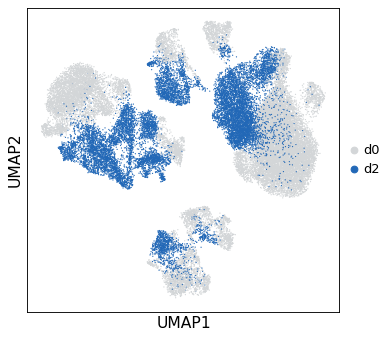

In [27]:
sc.pl.umap(adata, color=['day'], size=5,
           palette= colors_day_dict, title='', legend_fontsize='small', 
          save='_FigS1_ExpAll_day.svg')

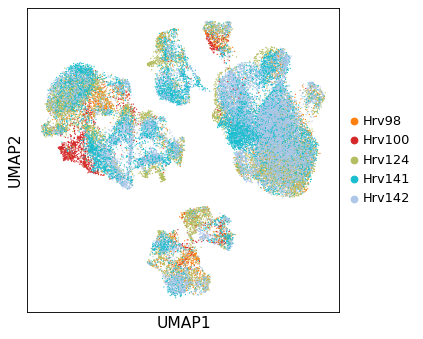

In [15]:
sc.pl.umap(adata, color=['donor_souporcell'], size=5,
        title='', legend_fontsize='small', 
          save='_FigS1_ExpAll_ondata_Donor.svg')

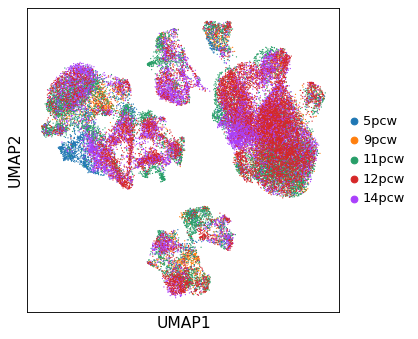

In [16]:
sc.pl.umap(adata, color=['pcw'], size=5,
        title='', legend_fontsize='small', 
          save='_FigS1_ExpAll_ondata_PCW.svg')

## Supplementaty Figure S2E

In [29]:
markers = ["TLR1","TLR2","TLR4","TLR5","TLR7",
           "IFNGR1","IFNGR2","IFNAR2","IFNAR1", 
           "IL6","IL24","IL1B",
           "CXCL1","CXCL3","CXCL8","CXCL16","CCL3","CCL4","CCL20",
          "C1QA","C1QB","C1QC","C1RL","C1S","C2"]


#### HB

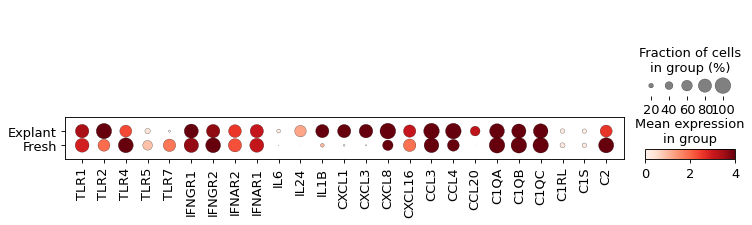

In [30]:
temp_cells = adata[adata.obs['identity_broad'] == 'HB']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_HBs.svg')#,layer='scaled',cmap='bwr', )

#### M3 / PAMM1

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


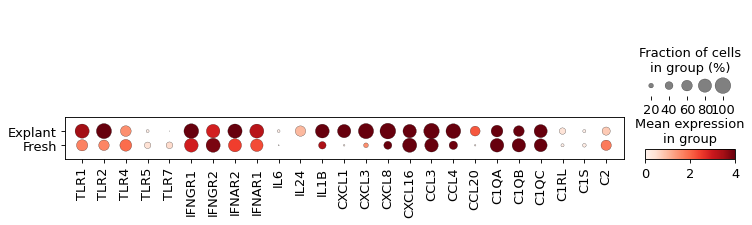

In [31]:
temp_cells = adata[adata.obs['identity_broad'] == 'M3']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_M3.svg')

#### VCT fusing

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


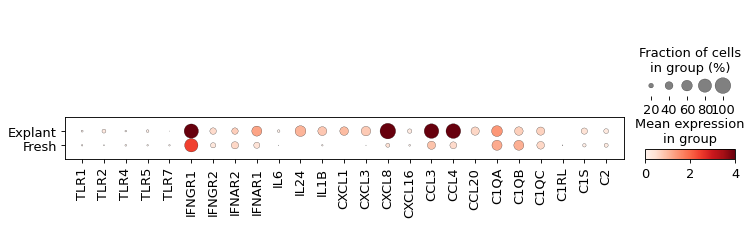

In [32]:
temp_cells = adata[adata.obs['identity'] == 'VCT_fusing']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_VCTfusing.svg')

#### VCT

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


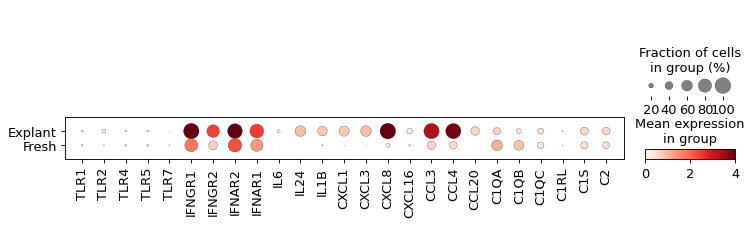

In [33]:
temp_cells = adata[adata.obs['identity'] == 'VCT']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_VCT.svg')

#### VCT CCC

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


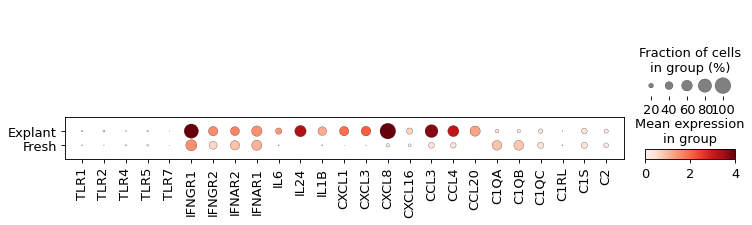

In [34]:
temp_cells = adata[adata.obs['identity'] == 'VCT_CCC']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_VCTccc.svg')

#### VCT p

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


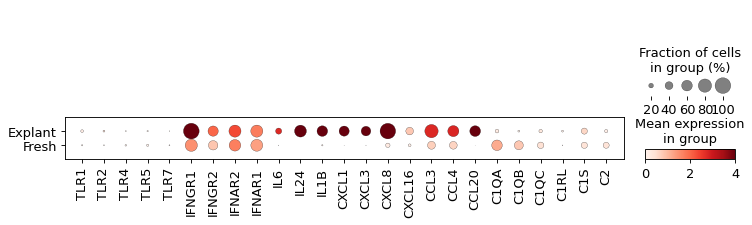

In [35]:
temp_cells = adata[adata.obs['identity'] == 'VCT_p']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_VCTp.svg')

#### EVT 1

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


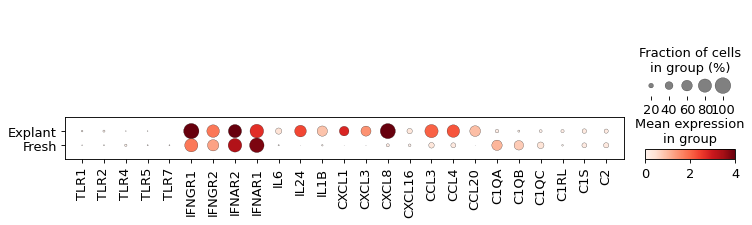

In [36]:
temp_cells = adata[adata.obs['identity'] == 'EVT_1']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_EVT1.svg')

#### EVT 2

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


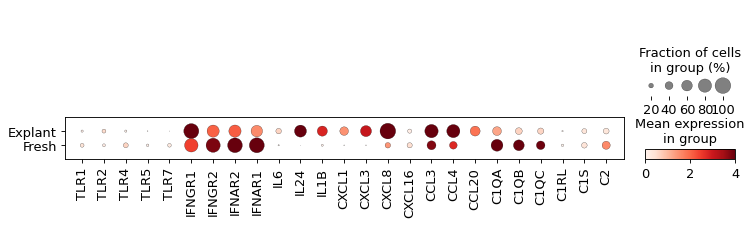

In [37]:
temp_cells = adata[adata.obs['identity'] == 'EVT_2']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_EVT2.svg')

#### iEVT

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


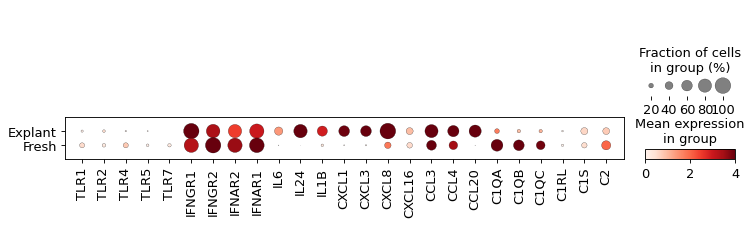

In [38]:
temp_cells = adata[adata.obs['identity'] == 'iEVT']


sc.pl.dotplot(temp_cells, markers, groupby='Tissue_type', dendrogram=True, 
              vmin=0, vmax=4,save='genesDefence_TissueType_iEVT.svg')

# Donor-donor variability in cell type distribution

<ipython-input-10-c1e22a37862e>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+ suffix+'.'+fig_format, bbox_inches='tight',


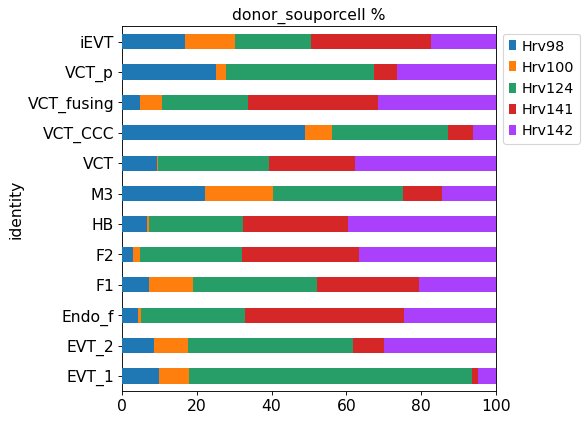

In [35]:
Barplot('donor_souporcell', adata, var= 'identity', height=6)